# Projeto #2 - Classificador supervisionado

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_2#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) Qual a base escolhida?

*The Labeled Faces in the Wild face recognition dataset*

http://vis-www.cs.umass.edu/lfw/


### 2) **(10%)** Pré-processamento: entendimento do conjunto de dados
- Quais são minhas features?
- Quais são minhas classes?
- Como estão distribuidas minhas classes?
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [0]:
#libraries
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
import seaborn as sns; sns.set()

In [0]:
#import dataset
faces = fetch_lfw_people(min_faces_per_person=100)

In [0]:
#Features
print(faces.data)
faces.data.shape[1]


[[ 82.666664  87.666664  65.333336 ... 106.       140.       199.33333 ]
 [ 52.333332  49.333332  69.333336 ... 235.66667  228.66667  222.      ]
 [ 37.333332  39.        41.666668 ...  97.        71.666664  59.333332]
 ...
 [228.33333  224.33333  216.       ... 149.66667  145.66667  164.66667 ]
 [ 97.666664 118.333336 133.33333  ... 219.       210.       142.      ]
 [ 39.333332  79.333336 109.333336 ...  24.333334  34.333332  24.      ]]


2914

In [0]:
#Classes
print(faces.target_names)
faces.target_names.shape[0]

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


5

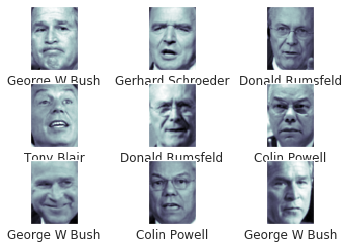

In [0]:
#Algumas das imagens que seram analizadas
fig, ax = plt.subplots(3,3)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])


### 3) **(80%)** Nos blocos seguintes implemente seus classificadores (serão implementados 2 métodos diferentes).

#### 3.1) Qual método escolhido?

*SVM*

#### 3.2) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# separando o X e y de treino e test
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [0]:
#Definindo o classificador
cls = SVC(class_weight='balanced', C = 10)

In [0]:
#train
cls.fit(Xtrain, ytrain)

SVC(C=10, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#predict
pred = cls.predict(Xtest)
pred


array([2, 0, 2, 3, 2, 2, 0, 4, 2, 2, 2, 2, 1, 0, 2, 0, 4, 4, 2, 0, 0, 2,
       2, 4, 2, 2, 4, 2, 2, 1, 4, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2,
       0, 3, 0, 2, 2, 0, 4, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 3,
       3, 2, 0, 2, 4, 2, 1, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 1, 2, 2, 2, 4, 2, 0, 0, 0, 2, 3, 2, 3, 2, 1, 2, 3, 2, 1, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 2, 1, 3, 1, 2, 4, 2, 1,
       0, 0, 4, 2, 3, 4, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 4, 0, 0, 4, 0, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 4, 4, 2, 4, 2, 4, 0, 2, 1, 2, 2, 2, 2, 3, 2, 1, 0, 0, 2,
       0, 2, 0, 4, 0, 3, 2, 2, 0, 1, 0, 2, 3, 4, 4, 3, 2, 1, 2, 2, 2, 2,
       2, 3, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 4, 2, 0, 2, 2, 1, 2,
       2, 3, 2, 0, 0, 2, 0, 2, 2, 3, 0, 2, 2, 3, 1, 2, 0, 2, 3, 2, 2, 2,
       4, 2, 1, 0, 4, 3, 4, 3, 2, 0, 0, 2, 4, 2, 0, 3, 2, 0, 2, 1, 4])

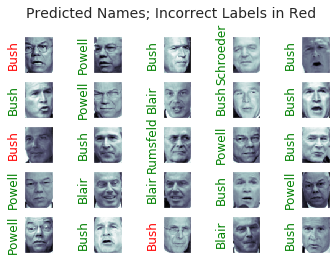

In [0]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.95      0.88      0.91        64
  Donald Rumsfeld       0.89      0.78      0.83        32
    George W Bush       0.83      0.95      0.89       127
Gerhard Schroeder       0.83      0.66      0.73        29
       Tony Blair       0.90      0.82      0.86        33

         accuracy                           0.87       285
        macro avg       0.88      0.82      0.84       285
     weighted avg       0.87      0.87      0.87       285



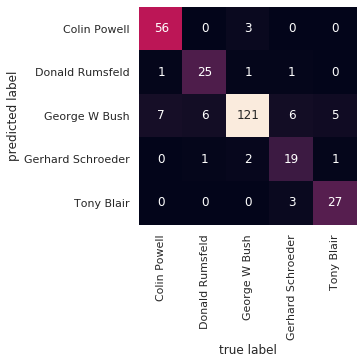

In [0]:
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 3.3) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
#aplicando PCA
n_components = 150
pca = PCA(n_components=n_components, whiten=True, random_state=42)
principal_components = pca.fit_transform(faces.data)
faces_pca = pca.inverse_transform(principal_components)

In [0]:
#separar as dados com o pca aplicado em train e test
Xtrain, Xtest, ytrain, ytest = train_test_split(faces_pca, faces.target, random_state=42)

In [0]:
model = make_pipeline(pca, cls)

In [0]:
model.fit(Xtrain, ytrain)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=150,
                     random_state=42, svd_solver='auto', tol=0.0,
                     whiten=True)),
                ('svc',
                 SVC(C=10, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [0]:
pred = model.predict(Xtest)
pred

array([0, 0, 2, 3, 2, 2, 0, 4, 2, 2, 2, 2, 1, 0, 2, 0, 4, 4, 2, 0, 0, 2,
       1, 2, 2, 2, 4, 2, 2, 1, 3, 1, 1, 0, 0, 0, 2, 0, 3, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 3,
       3, 2, 0, 2, 4, 2, 1, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 1, 2, 2, 2, 4, 2, 0, 2, 0, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 2, 2,
       3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 3, 1, 2, 4, 2, 1,
       0, 0, 4, 2, 2, 4, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2, 4,
       2, 3, 2, 2, 0, 4, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 4, 4, 0, 4, 2, 4, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 3, 2, 2, 0, 2, 0, 2, 3, 4, 4, 2, 2, 1, 2, 2, 2, 2,
       2, 3, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 0, 2, 2, 3, 0, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 2,
       4, 2, 2, 0, 4, 3, 4, 3, 2, 0, 0, 2, 4, 2, 0, 2, 2, 0, 2, 2, 4])

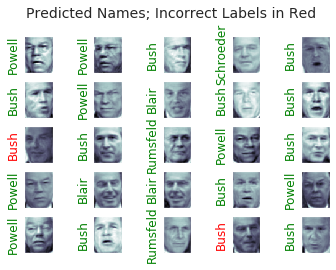

In [0]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [0]:
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       1.00      0.92      0.96        64
  Donald Rumsfeld       1.00      0.56      0.72        32
    George W Bush       0.77      1.00      0.87       127
Gerhard Schroeder       0.95      0.62      0.75        29
       Tony Blair       1.00      0.73      0.84        33

         accuracy                           0.86       285
        macro avg       0.94      0.77      0.83       285
     weighted avg       0.89      0.86      0.86       285



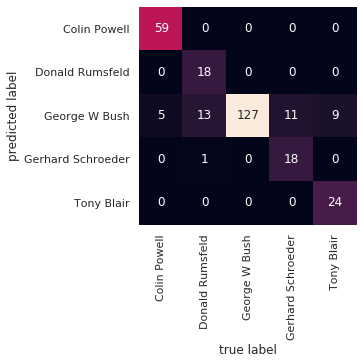

In [0]:
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 3.4) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# modificando os hyperparametros com gridsearch 
params_grid = {
    'C': [5, 10, 15, 20],
    'gamma': [0.001, 0.005, 0.010, 0.015]
}

cls_grid = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), params_grid
)

In [0]:
model_grid = make_pipeline(pca, cls_grid)

In [35]:
model_grid.fit(Xtrain, ytrain)
print('Melhor hyperparametro encontrado foi:')
cls_grid.best_estimator_

Melhor hyperparametro encontrado foi:


SVC(C=5, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
pred = model_grid.predict(Xtest)
pred

array([0, 0, 2, 3, 2, 2, 0, 4, 2, 2, 2, 2, 1, 0, 2, 0, 4, 4, 2, 0, 0, 2,
       1, 2, 2, 2, 4, 2, 2, 1, 3, 1, 1, 0, 0, 0, 2, 0, 3, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 3,
       3, 2, 0, 2, 4, 2, 1, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 1, 2, 2, 2, 4, 2, 0, 2, 0, 2, 3, 2, 3, 0, 2, 2, 1, 2, 1, 2, 2,
       3, 2, 2, 2, 0, 2, 2, 1, 2, 1, 2, 0, 2, 0, 0, 1, 3, 1, 2, 4, 2, 1,
       0, 0, 4, 2, 0, 4, 0, 3, 2, 0, 2, 1, 2, 0, 3, 2, 2, 2, 2, 2, 2, 4,
       2, 3, 4, 0, 0, 4, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 1, 2, 2, 2, 0, 2,
       2, 2, 2, 4, 4, 0, 4, 2, 4, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 2, 0, 3, 0, 3, 2, 2, 0, 1, 0, 2, 3, 4, 4, 2, 2, 1, 2, 2, 2, 2,
       2, 3, 0, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 4, 4, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 3, 0, 0, 2, 3, 1, 2, 0, 2, 3, 2, 2, 2,
       4, 2, 0, 0, 4, 3, 4, 3, 2, 0, 0, 2, 4, 2, 0, 3, 2, 0, 2, 1, 4])

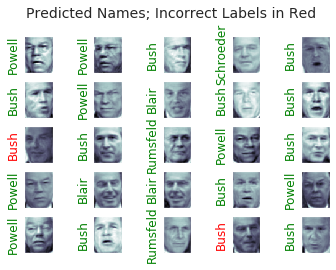

In [37]:
fig, ax = plt.subplots(5, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1], color='green' if pred[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [38]:
print(classification_report(ytest, pred, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.91      0.94      0.92        64
  Donald Rumsfeld       1.00      0.72      0.84        32
    George W Bush       0.85      0.98      0.91       127
Gerhard Schroeder       0.96      0.79      0.87        29
       Tony Blair       1.00      0.79      0.88        33

         accuracy                           0.90       285
        macro avg       0.94      0.84      0.88       285
     weighted avg       0.91      0.90      0.90       285



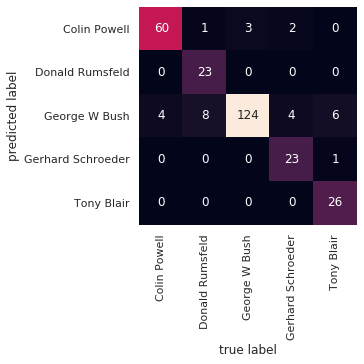

In [39]:
matriz = confusion_matrix(ytest, pred)
sns.heatmap(matriz.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#### 3.5) Qual método escolhido?

Indique o método escolhido

#### 3.6) **(10%)** Baseline - Implemente seu classificador da forma mais simples possível para esse ser seu baseline

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.7) **(20%)** Versão 1 - O que podemos fazer para melhorar nosso baseline? Aplique técnicas como redução de dimensionalidade, normalização ou outras. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

#### 3.8) **(10%)** Tunning - Agora que temos um resultado promissor, vamos tentar melhorar o resultado alterando um ou mais hiper-parametro. Compare os resultados.

In [0]:
# Implementação. Use mais blocos se achar que ficará mais organizado.

### 5) **(10%)** Conclusões

*Compare seus resultados. Imaginando que sua solução fosse para produção, qual deles você escolheria? Por que? Quais os riscos você enxerga? O que recomendaria de próximos passos para melhorar os resultados?*